<a href="https://colab.research.google.com/github/mantashamqbl/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up the environment

In [16]:
from google.colab import drive
import os
# Create the directory if it doesn't exist
os.makedirs('/intense_data/drive', exist_ok=True)

# Mount Google Drive to the directory
drive.mount('/intense_data/drive')

# Setting the working directory
os.chdir('/intense_data/drive/MyDrive/Intensity Analysis')

# Now any file operations will be relative to this directory
print("Current working directory:", os.getcwd())

Drive already mounted at /intense_data/drive; to attempt to forcibly remount, call drive.mount("/intense_data/drive", force_remount=True).
Current working directory: /intense_data/drive/MyDrive/Intensity Analysis


In [17]:
!pip install tensorflow-text
#Importing essential libraries and functions
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'keras.preprocessing.text'

Loading dataset

In [18]:
#Importing dataset
import pandas as pd

# 1. Check if the file exists in the current working directory
import os
print(os.listdir())  # List files in the current directory to see if 'angriness.csv' is present
angriness_data = pd.read_csv('/intense_data/drive/MyDrive/intensity_data/angriness.csv')
angriness_data.head()


['Data']


,content,intensity
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angriness
1,Not available for busy people☺,angriness
2,I do not exist to impress the world. I exist t...,angriness
3,Everything is getting expensive except some pe...,angriness
4,My phone screen is brighter than my future 🙁,angriness


In [19]:
# 1. Check if the file exists in the current working directory
import os
print(os.listdir())  # List files in the current directory to see if 'happiness.csv' is present
happiness_data = pd.read_csv('/intense_data/drive/MyDrive/intensity_data/happiness.csv')
happiness_data.head()


['Data']


,content,intensity
0,Wants to know how the hell I can remember word...,happiness
1,Love is a long sweet dream & marriage is an al...,happiness
2,The world could be amazing when you are slight...,happiness
3,My secret talent is getting tired without doin...,happiness
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happiness


In [20]:

# 1. Check if the file exists in the current working directory
import os
print(os.listdir())  # List files in the current directory to see if 'sadness.csv' is present
sadness_data = pd.read_csv('/intense_data/drive/MyDrive/intensity_data/sadness.csv')
sadness_data.head()


['Data']


,content,intensity
0,"Never hurt people who love you a lot, because ...",sadness
1,Don’t expect me to tell you what you did wrong...,sadness
2,I preferred walking away than fighting for you...,sadness
3,"Moving forward in life isn’t the hard part, it...",sadness
4,"Never cry for anyone in your life, because tho...",sadness


In [21]:
#adding labels
angriness_data['label'] = 'angry'
sadness_data['label'] = 'sad'
happiness_data['label'] = 'happy'


In [22]:
combined_data = pd.concat([angriness_data, sadness_data, happiness_data], ignore_index = True)
combined_data.head()


,content,intensity,label
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angriness,angry
1,Not available for busy people☺,angriness,angry
2,I do not exist to impress the world. I exist t...,angriness,angry
3,Everything is getting expensive except some pe...,angriness,angry
4,My phone screen is brighter than my future 🙁,angriness,angry


In [23]:
combined_data.tail()

,content,intensity,label
2034,"If I know what love is, it is because of you.",happiness,happy
2035,The spaces between your fingers are meant to b...,happiness,happy
2036,In you i H've Found the love of my life and my...,happiness,happy
2037,The magic of first love is our ignorance that ...,happiness,happy
2038,Love can't be found Where it doesn't exist ..,happiness,happy


In [15]:
combined_data.shape

(2039, 2)

In [24]:
combined_data.describe()


,content,intensity,label
count,2039,2039,2039
unique,1586,3,3
top,"['You Hurt Me But I Still Love You.', 'True Lo...",happiness,happy
freq,134,708,708


In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   intensity  2039 non-null   object
dtypes: object(2)
memory usage: 32.0+ KB


In [25]:
print(len(combined_data))
combined_data['intensity'].value_counts()

2039


,count
intensity,
happiness,708
angriness,696
sadness,635


In [26]:
# checking for missing values
combined_data.isnull().values.any()

False

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

In [27]:
combined_data = combined_data.drop_duplicates()


In [28]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    1592 non-null   object
 1   intensity  1592 non-null   object
 2   label      1592 non-null   object
dtypes: object(3)
memory usage: 49.8+ KB


<ipython-input-29-6882e291e21c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='intensity', data=combined_data, palette='hls')


<Axes: xlabel='intensity', ylabel='count'>

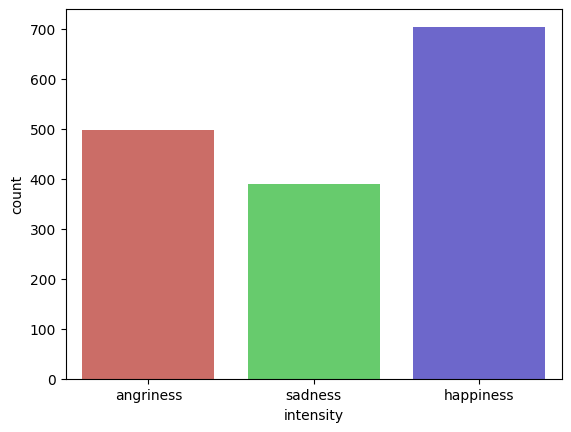

In [29]:
#lets observe different intensity in dataset.
import seaborn as sns
sns.countplot(x='intensity', data=combined_data, palette='hls')


Data Preprocessing

In [10]:
combined_data["content"]

NameError: name 'combined_data' is not defined

In [5]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
def preprocessing_txt(sen):
  sentence = remove_tags(sen) #remove tags
  sentence = re.sub('[^a-zA-Z]', ' ', sentence) #remove punctuations and numbers
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) #single character removal
  sentence = re.sub(r'\s+', ' ', sentence) #remove multiple spaces
  sentence = sen.lower() #lowercasing
  sentence = sentence.split()
  stop_words = set(stopwords.words('english')) #remove stopwords
  sentence = [word for word in sentence if word not in stop_words]
  sentence = ' '.join(sentence)
  return sentence


In [9]:
#calling preprocessing function on content
x = []
sentences = list(combined_data["content"])
for sen in sentences:
    x.append(preprocessing_txt(sen))
print(sentences[0])
print(x[0])


NameError: name 'combined_data' is not defined

In [35]:
# Ensure X and y have the same length after preprocessing
combined_data['processed_content'] = x  # Add processed content to DataFrame

# Reset index before dropping duplicates to avoid index mismatch
combined_data.reset_index(drop=True, inplace=True)

# Drop duplicates based on processed content
combined_data.drop_duplicates(subset=['processed_content'], inplace=True)

# Update labels to match the updated DataFrame after duplicate removal
labels = combined_data['label'].map({'angry': 0, 'happy': 1, 'sad': 2}).values

#splitting the dataframe into features(X) and labels(y)
X = combined_data['processed_content'].tolist() # Use updated 'processed_content'
y = labels  # Use updated labels
print ('Features:', X[5:])
print ('Labels:', y[:])

Features: ['anger feeling makes mouth work faster mind..', 'man, man, man, good man, way man, man, keep man, man, idiot man, busy man, man, 30 man, seconds man! read without man', 'sometimes best way get someone\\’s attention stop giving yours.', 'people like bring past, present future look better theirs.', 'wakeup>job>noluv>daaru>sleep>repeat..', 'u haters!!! thanks making famous. don’t give sh***t u talk behind back.', 'hurts worst person made feel special yesterday makes feel unwanted today.', 'life short don’t waste reading whatsapp status', 'treated way treat me, would hate guts.', 'girls r like potato chips…you can’t 1', 'asked life would sacrificed smile… you’ve stripped pride', 'people always miss find much happier without them.', 'people change one two reasons: learned lot, hurt many times.', 'fail feels shame steps away success ☺', 'get betrayed people never thought of…', 'ass ever get jealous shit comes ur mouth?', 'give lots importance someone, loss importance life….', 'sol

In [36]:
from sklearn.model_selection import train_test_split
#train set will be used to train our deep learning models.
#while test will be used to evaluate how well our model performs.
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

Preparing embedding layer

In [37]:
#embedding layers expects words to be in nueric form.
#using tokenizer function from keras.preprocessing.text library
#method fit_on_text trains the tokenizer
#method texts_to_sequences converts sentences to numeric form
!pip install keras
!pip install tensorflow-text
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# Tokenization and padding
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train = word_tokenizer.texts_to_sequences(X_train) # Changed tokenizer to word_tokenizer
X_test = word_tokenizer.texts_to_sequences(X_test)  # Changed tokenizer to word_tokenizer
#adding 1 to store the dimensions for words for which no pretrained word embeddings exists
vocab_size = len(word_tokenizer.word_index) + 1 # Changed tokenizer to word_tokenizer
print("vocab_size:", vocab_size)

vocab_size: 2359


In [4]:
#padding all content to fixed length
max_length = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

NameError: name 'pad_sequences' is not defined

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip -d /intense_data/drive/MyDrive/intensity_data/

--2024-12-16 13:04:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-16 13:04:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-16 13:04:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
#load GloVe word embeddings and create an embeddings dictionay
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('/intense_data/drive/MyDrive/intensity_data/glove.6B.100d.txt', encoding='utf8')
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
#create embedding matrix having 100 columns
#containing 100 dimensional GloVe word embeddings for all words in our corpus

embedding_matrix = zeros((vocab_size, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix.shape

Model Training with Recurrent Neural Network (LSTM)

In [ ]:
from keras.layers import LSTM
#neural network architecture
lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))
lstm_model.add(Dense(3, activation='softmax'))

In [ ]:
#model compiling
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print ('LSTM Model Summary:', lstm_model.summary())

In [ ]:
#model training
lstm_history = lstm_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

In [ ]:
#prediction on the test set
score=lstm_model.evaluate(X_test, y_test,verbose=1)
#model performance
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [3]:
#Model performance charts
import matplotlib.pyplot as plt
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'lstm_history' is not defined

In [ ]:
#saving the model as h5 file for possible use later
lstm.model.save(f'./cl_lstm_model_acc_{round(score[1],3)}.h5', save_format='h5')


Make Predictions on live on Sentiment intensity Analysis Data


In [ ]:
#list files in working directory
:ls


In [1]:
#Loading new live chat data from my whatsapp group(meet up)
sample_data = pd.read_txt('/intense_data/drive/MyDrive/intensity_data/sample_data.txt')
sample_data.head()

NameError: name 'pd' is not defined

In [2]:
#preprocess content with earlier defined preprocess_text function
unseen_data = sample_data["content"]
unseen_processed = []
for content in unseen_data:
    content = preprocess_txt(content)
    unseen_data.append(content)

NameError: name 'sample_data' is not defined

In [ ]:
#Tokenising instance with earlier trained tokenizer
unseen_sequences = word_tokenizer.texts_to_sequences(unseen_processed)
#pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_sequences, padding='post', maxlen=max_length)


In [ ]:
#passing tokenised instance to the LSM model for predictions
unseen_intensity = lstm_model.predict(unseen_padded)
unseen_intensity

In [ ]:
#writing model output file back to google drive
sample_data['predicted_intensity'] = np.round(unseen_intensity)
df_predicted_intensity = pd.DataFrame(sample_data['predicted_intensity], column =['predicted_intensity'])
df_content = pd.DataFrame(sample_data['content'], column =['content'])
df_label = pd.DataFrame(sample_data['label'], column =['label'])
dfx*pd.concat([df_content, df_predicted_intensity, df_label], axis=1)
dfx.to_csv('./sample_data.csv',sep=',',encoding ='UTF-8'')
dfx.head()